# This notebook demonstrates effect of Dimensionality reduction on the Efficiency of the in-built classifiers from scikit learn's library  with regards to

(a) Various synthetic dataset.
(b) Range of dimensions after performing dimensionality reduction.

The point of this example is to illustrate the nature of different datasets after dimesnsinality reduction and passig them to different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Experiments were performed to see effect of reducing dataset dimensions from high dimensional space to a lower dimensions for classification. For Dimensionality reduction, inbuilt algorithm from sklearn were considered. 
For classification pre-established sklearn algorithms are used. 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [20]:
names = ["KNN","Random Forest", "svm"]
classifiers = [
    KNeighborsClassifier(5),
    RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'),
    SVC(kernel="linear", C=0.025)]

Datasets used have 1000 samples and 2 signal dimensions each along with 98 noise dimensions. For generating synthetic noise establish sklearn algorithms were used. 
Noise is a gaussian noise with mean of 0 and variance of 1. 
Noise Dimensions are concatinated to Signal Dimensions to make each dataset of shape (1000,100) 

In [21]:
def make_dataset(n_samples, n_features):
    
    Moons = make_moons(n_samples=n_samples, shuffle=True, noise=.05)
    df1 = pd.DataFrame(Moons[0],columns=['x'+str(i) for i in range(1,n_features+1)])
    Noise_moon = np.random.normal(0, 10,[n_samples, 98])
    df_noise1 = (pd.DataFrame(Noise_moon, columns=['dim'+ str(i) for i in range(1,98+1)]))
    dataset_noise1 = (pd.concat([df1, df_noise1],axis = 1))
    X1 = dataset_noise1.iloc[:, :].values 
    X11 = StandardScaler().fit_transform(X1)

    Classification = make_classification(n_samples = n_samples, n_features=n_features, n_redundant=0, n_informative=n_features, n_clusters_per_class=1, random_state=8)
    df2 = pd.DataFrame(Classification[0],columns=['x'+str(i) for i in range(1,n_features+1)])
    Noise_class = np.random.normal(0, 10,[n_samples, 98])
    df_noise2 = (pd.DataFrame(Noise_class, columns=['dim'+ str(i) for i in range(1,98+1)]))
    dataset_noise2 = (pd.concat([df2, df_noise2],axis = 1))
    X2 = dataset_noise2.iloc[:, :].values
    X12 = StandardScaler().fit_transform(X2)


    Blobs = make_blobs(n_samples=n_samples, centers=n_features, cluster_std=1.0, shuffle=True, random_state=8)
    df3 = pd.DataFrame(Blobs[0],columns=['x'+str(i) for i in range(1,n_features+1)])
    Noise_blobs = np.random.normal(0, 10,[n_samples, 98])
    df_noise3 = (pd.DataFrame(Noise_blobs, columns=['dim'+ str(i) for i in range(1,98+1)]))
    dataset_noise3 = (pd.concat([df3, df_noise3],axis = 1))
    X3 = dataset_noise3.iloc[:, :].values
    X13 = StandardScaler().fit_transform(X3)

    dataset = [X11, X12, X13]
    labels = [Moons[1], Classification[1], Blobs[1] ]
    return(dataset, labels)

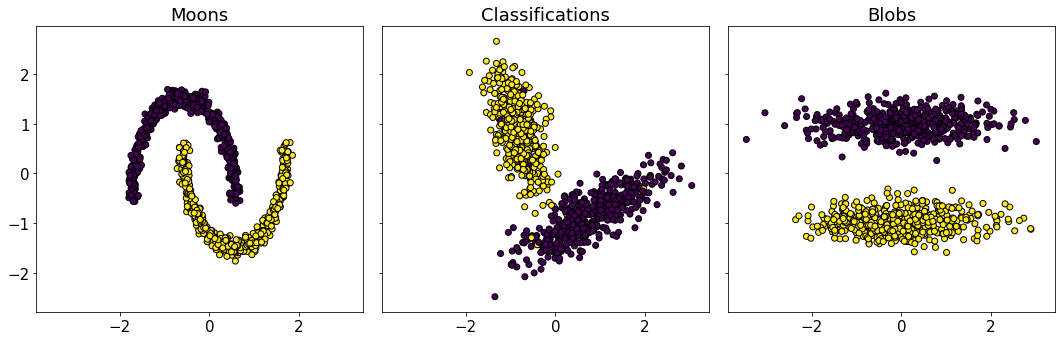

In [22]:
Xp,Yp = make_dataset(1000,2)
fig1, axs11 = plt.subplots(1, 3, figsize=((15,5)), sharex=True,sharey=True )
(ax1, ax2, ax3) = axs11
ax1.scatter(Xp[0][:,0], Xp[0][:,1], c= Yp[0], edgecolors='k')
ax1.title.set_text('Moons')
ax2.scatter(Xp[1][:,0], Xp[1][:,1], c= Yp[1], edgecolors='k')
ax2.title.set_text('Classifications')
ax3.scatter(Xp[2][:,0], Xp[2][:,1], c= Yp[2], edgecolors='k')
ax3.title.set_text('Blobs')


plt.tight_layout()
plt.show()

In [23]:
#Performing Classification function for 1 dataset
def perform_classification(X,Y):
    j = 1
    dim_class = []
    score_class = []

    for name, clf in zip(names, classifiers):
        dim_rep = []
        score_rep = []
        #Each Dimensions
        for j in range (100 , 1 , -1):
            pca = PCA(n_components=j)
            principalComponents = pca.fit_transform(X)
            principalDf = pd.DataFrame(data = principalComponents
                         , columns = ['principal component'+str(i) for k in range(1,1+j)])
            principalDf['y'] = Y

            a = principalDf.iloc[:, :-1].values
            b = principalDf['y']
            X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=.4)

            clf.fit(X_train, y_train)
            score_dim = clf.score(X_test, y_test)
            score_rep.append(score_dim)
            dim_rep.append(j)

        if (name == "KNN" ):
            dim_knn = dim_rep
            score_knn = score_rep
        elif (name == "Random Forest"):
            dim_rf = dim_rep
            score_rf = score_rep
        else:
            dim_svm = dim_rep
            score_svm = score_rep
        
    return (dim_knn,score_knn,score_rf,score_svm)

In [26]:
#Plotting function
def plot_graph(dim_all,sknn,srf,ssvm):    
    event=[]
    for i in range(0,len(dim_all)):
        event.append('KNN')
    for j in range(0,len(dim_all)):
        event.append('RF')
    for k in range(0,len(dim_all)):
        event.append('SVM')

    dims=np.concatenate((dim_all,dim_all,dim_all))
    scores=np.concatenate((sknn,srf,ssvm))

    data={'Number of Noise Dimensions':dims,'Acc':scores,'Event':event}
    
    return(data)

In [29]:
sim = 50
n_features = 2
n_samples = 1000
data1_rf_acc = []
data1_svm_acc = []
data1_knn_acc = []
data1_num_dims = []

data2_rf_acc = []
data2_svm_acc = []
data2_knn_acc = []
data2_num_dims = []

data3_rf_acc = []
data3_svm_acc = []
data3_knn_acc = []
data3_num_dims = []

for i in range (sim):
    
    Xp,Yp = make_dataset(n_samples,n_features)
    temp_score_knn = []
    temp_score_rf = []
    temp_score_svm = []
    n_dims = []
    
    for X, Y in zip(Xp,Yp):
        
        dim_n,score_knn,score_rf,score_svm = perform_classification(X,Y)
        
        temp_score_knn += score_knn
        temp_score_rf += score_rf
        temp_score_svm += score_svm
        n_dims += dim_n
    
    if (np.all(X) == np.all(Xp[0])):
        data1_knn_acc += temp_score_knn
        data1_rf_acc += temp_score_rf
        data1_svm_acc += temp_score_svm
        data1_num_dims += n_dims
        data1 = plot_graph(data1_num_dims,data1_knn_acc,data1_rf_acc,data1_svm_acc)
        
    elif (np.all(X) == np.all(Xp[1])):
        data2_knn_acc += temp_score_knn
        data2_rf_acc += temp_score_rf
        data2_svm_acc += temp_score_svm
        data2_num_dims += n_dims
        data2 = plot_graph(data2_num_dims,data2_knn_acc,data2_rf_acc,data2_svm_acc)
    else:
        data3_knn_acc += temp_score_knn
        data3_rf_acc += temp_score_rf
        data3_svm_acc += temp_score_svm
        data3_num_dims += n_dims
        data3 = plot_graph(data3_num_dims,data3_knn_acc,data3_rf_acc,data3_svm_acc)

# Inference :
In the plot we can see different trends with respect to the different shapes of the dataset.  
In case of Blobs, Number of dimensions help in clasification of the dataset. As we try to reduce dimensions, Accuracy of the classification for classifiers decresses steadyly. 
In case of Moons and Classification_dataset, there is not much change in accuracy of the classiers till a particular dimentional threshould. After that a considerable spike is observed indicating exponential cahnges in the accuracy of the classifiers. 


Text(0.0, 0.5, 'Accuracy')

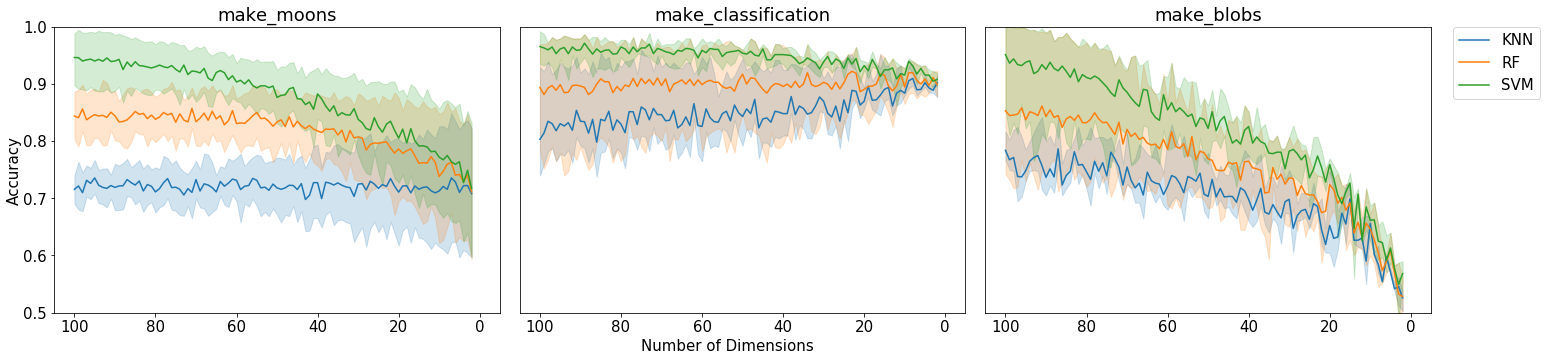

In [30]:
plt.rcParams.update({'font.size':15})
fig,ax=plt.subplots(1,3,figsize=(20,5),sharex=True,sharey=True)
plt.subplot(1,3,1)
plt.ylim(0.5,1)
plt.xlim(105,-5)
plt.title('make_moons')
ax1=sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data) 
ax1.get_legend().remove()
plt.subplot(1,3,2)
plt.ylim(0.5,1)
plt.xlim(105,-5)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.title('make_classification')
ax2=sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data2)
ax2.legend_ = None
plt.subplot(1,3,3)
plt.ylim(0.5,1)
plt.xlim(105,-5)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.title('make_blobs')
ax3=sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data3) 
plt.tight_layout()


plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
fig.text(0.5, 0.00, 'Number of Dimensions', ha='center')
fig.text(0.00, 0.5, 'Accuracy', va='center', rotation='vertical')
